## Auction Duration Stats
### By: Brianj (https://twitter.com/pbrianandj)

In [25]:
from matplotlib import pyplot as plt

In [26]:
from python_graphql_client import GraphqlClient

# Instantiate the client with an endpoint.
client = GraphqlClient(endpoint="https://api.thegraph.com/subgraphs/name/nounsdao/nouns-subgraph")

In [27]:
# Create the query string and variables required for the request.
query = """
    {
  auctions(first: 1000, orderBy: id) {
    id,
    startTime
    endTime
  }
}
"""
# Synchronous request
data = client.execute(query=query)

In [34]:
diff = []
auction_id = []

pairs = []
for auction in data['data']['auctions']:
    duration = (int(auction['endTime']) - int(auction['startTime']))/(3600)
    diff.append(duration)
    auction_id.append(auction['id'])
    pairs.append((int(auction['id']), duration))

## Longest Auction

In [30]:
print(f"Longest auction duration (hours): {max(diff)}")

Longest auction duration (hours): 24.825555555555557


In [32]:
print(f"Longest auction: {auction_id[diff.index(max(diff))]}")

Longest auction: 99


## Auction Duration Histogram

Text(0, 0.5, 'Number of auctions')

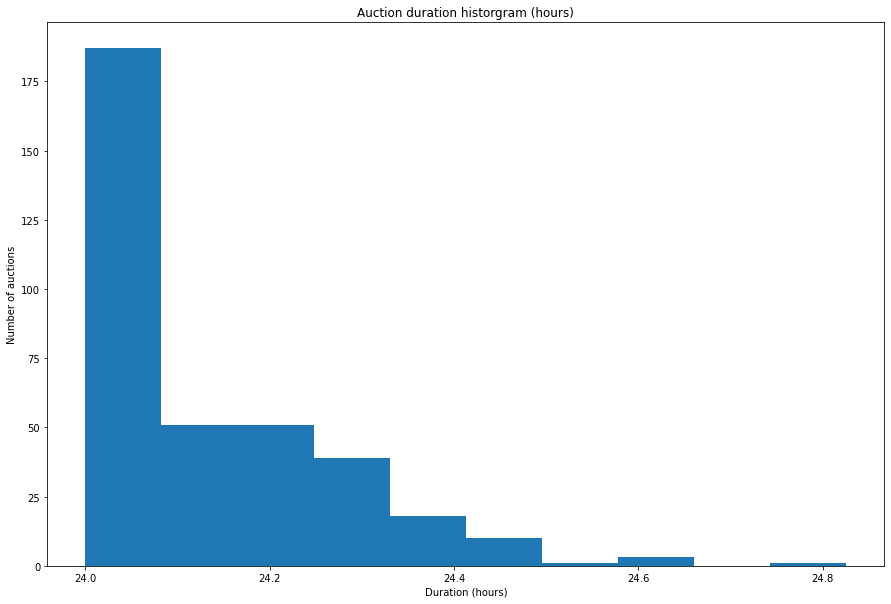

In [24]:
plt.figure(figsize=(15,10))
plt.title("Auction duration historgram (hours)")
plt.hist(diff)
plt.xlabel('Duration (hours)')
plt.ylabel('Number of auctions')

## Auction Duration vs Time

Text(0.5, 0, 'Auction id')

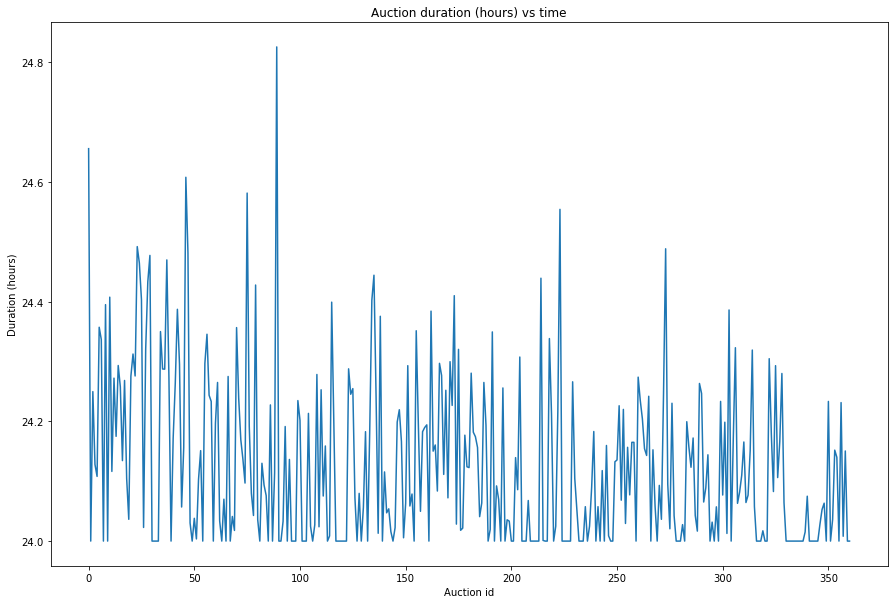

In [38]:
pairs = sorted(pairs, key=lambda x: x[0])
auction_ids, durations = zip(*pairs)
plt.figure(figsize=(15,10))
plt.title("Auction duration (hours) vs time")
plt.plot(durations)
plt.ylabel('Duration (hours)')
plt.xlabel('Auction id')